Classificando diferentes tipos de semente de abóbora 🎃🌱

A base de dados "SementesAbobora.xlsx" possui um estudo foi realizado nos dois tipos de sementes de abóbora mais importantes e de qualidade, “Ürgüp Sivrisi” e “Çerçevelik”, geralmente cultivadas nas regiões de Ürgüp e Karacaören na Turquia.

Muitas espécies de sementes têm semelhanças visuais, o que torna a classificação manual difícil e sujeita a erros. Redes neurais podem ser treinadas para identificar padrões que não são facilmente perceptíveis pelo olho humano, aumentando a precisão da classificação.

Visto a complexidade das características das sementes x a precisão dos resultados, iremos utilizar as redes neurais multilayer perceptron.

Features
 - Perímetro
 - Maior_Eixo_Comprimento
 - Comprimento_Eixo_Menor
 - Área_Convexa
 - Equiv_Diâmetro
 - Excentricidade
 - Solidez
 - Extensão
 - Redondeza
 - Proporcao
 - Compacidade

 Target
Classes: ((A)Çerçevelik, (B)Ürgüp Sivrisi)

In [54]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
     

In [55]:
df = pd.read_csv(r'https://raw.githubusercontent.com/evelyncosta00/deep_learning/main/classificando_semente_abobora/dataset/SementesAbobora.csv',sep = ";",encoding='latin-1')

# Análise exploratória 

In [56]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,"888,242","326,1485","220,2388",56831,"267,6805","0,7376","0,9902","0,7453","0,8963","1,4809","0,8207",(A) Çerçevelik
1,76631,"1068,146","417,1932","234,2289",77280,"312,3614","0,8275","0,9916","0,7151","0,844","1,7811","0,7487",(A) Çerçevelik
2,71623,"1082,987","435,8328","211,0457",72663,"301,9822","0,8749","0,9857","0,74","0,7674","2,0651","0,6929",(A) Çerçevelik
3,66458,"992,051","381,5638","222,5322",67118,"290,8899","0,8123","0,9902","0,7396","0,8486","1,7146","0,7624",(A) Çerçevelik
4,66107,"998,146","383,8883","220,4545",67117,"290,1207","0,8187","0,985","0,6752","0,8338","1,7413","0,7557",(A) Çerçevelik


os dados estão ordenado, para não comprometer o aprendizado de máquina, vamos embaralhar.

In [57]:
df = shuffle(df)
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
697,75795,"1052,093","404,6336","238,9541",76547,"310,6528","0,807","0,9902","0,7306","0,8605","1,6934","0,7677",(A) Çerçevelik
1659,89066,"1177,335","478,8952","237,373",89680,"336,7527","0,8685","0,9932","0,6136","0,8075","2,0175","0,7032",(B) Ürgüp Sivrisi
1103,80595,"1130,052","452,6233","228,4835",81798,"320,3385","0,8632","0,9853","0,6112","0,7931","1,981","0,7077",(A) Çerçevelik
1293,95095,"1210,274","465,3052","262,3029",96519,"347,9637","0,826","0,9852","0,728","0,8158","1,7739","0,7478",(A) Çerçevelik
1124,70719,"1042,694","408,8479","221,1036",71514,"300,0704","0,8412","0,9889","0,7514","0,8174","1,8491","0,7339",(A) Çerçevelik


verificando se a base esta equilibrada - caso não esteja, aplicar tecnicas de reamostragem ou coletar mais dados

In [58]:
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

In [59]:
df.columns

Index(['Area', 'Perímetro', 'Maior_Eixo_Comprimento', 'Comprimento_Eixo_Menor',
       'Área_Convexa', 'Equiv_Diâmetro', 'Excentricidade', 'Solidez',
       'Extensão', 'Redondeza', 'Proporcao', 'Compacidade', 'Class'],
      dtype='object')

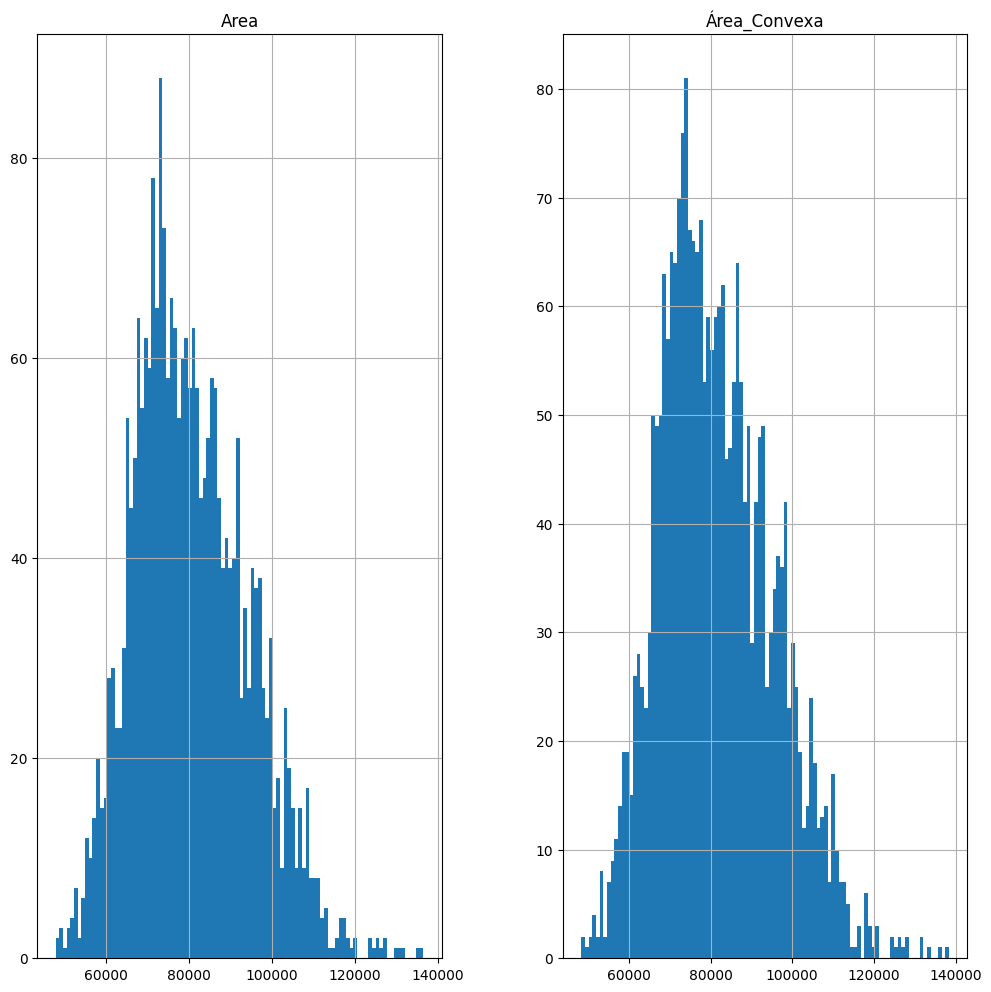

In [60]:
#Plotando histogramas para analisar a simetria dos dados
df.hist(bins=100, figsize=(12, 12))
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 697 to 511
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Area                    2500 non-null   int64 
 1   Perímetro               2500 non-null   object
 2   Maior_Eixo_Comprimento  2500 non-null   object
 3   Comprimento_Eixo_Menor  2500 non-null   object
 4   Área_Convexa            2500 non-null   int64 
 5   Equiv_Diâmetro          2500 non-null   object
 6   Excentricidade          2500 non-null   object
 7   Solidez                 2500 non-null   object
 8   Extensão                2500 non-null   object
 9   Redondeza               2500 non-null   object
 10  Proporcao               2500 non-null   object
 11  Compacidade             2500 non-null   object
 12  Class                   2500 non-null   object
dtypes: int64(2), object(11)
memory usage: 273.4+ KB


não existem muitos outliers, variáveis com a distribuição quase que normal

In [62]:
df.tail()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2279,75714,"1087,855","444,7661","217,8407",76370,"310,4868","0,8718","0,9914","0,6686","0,804","2,0417","0,6981",(B) Ürgüp Sivrisi
1808,70907,"1091,266","455,6401","199,2622",71654,"300,469","0,8993","0,9896","0,615","0,7482","2,2866","0,6594",(B) Ürgüp Sivrisi
2155,89236,"1249,029","523,925","217,9624",90416,"337,0739","0,9094","0,9869","0,5421","0,7188","2,4037","0,6434",(B) Ürgüp Sivrisi
147,99115,"1245,19","473,7952","268,4639",100258,"355,2424","0,824","0,9886","0,7203","0,8033","1,7648","0,7498",(A) Çerçevelik
511,72519,"1041,227","413,2742","224,0976",73130,"303,8652","0,8402","0,9916","0,6903","0,8406","1,8442","0,7353",(A) Çerçevelik


In [63]:
df['Area'] = df['Area'].replace(',', '.').astype(float)
df['Perímetro'] = df['Perímetro'].str.replace(',', '.').astype(float)
df['Maior_Eixo_Comprimento'] = df['Maior_Eixo_Comprimento'].str.replace(',', '.').astype(float)
df['Comprimento_Eixo_Menor'] = df['Comprimento_Eixo_Menor'].str.replace(',', '.').astype(float)
df['Área_Convexa'] = df['Área_Convexa'].replace(',', '.').astype(float)
df['Equiv_Diâmetro'] = df['Equiv_Diâmetro'].str.replace(',', '.').astype(float)
df['Excentricidade'] = df['Excentricidade'].str.replace(',', '.').astype(float)
df['Solidez'] = df['Solidez'].str.replace(',', '.').astype(float)
df['Extensão'] = df['Extensão'].str.replace(',', '.').astype(float)
df['Redondeza'] = df['Redondeza'].str.replace(',', '.').astype(float)
df['Proporcao'] = df['Proporcao'].str.replace(',', '.').astype(float)
df['Compacidade'] = df['Compacidade'].str.replace(',', '.').astype(float)


In [64]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
697,75795.0,1052.093,404.6336,238.9541,76547.0,310.6528,0.8070,0.9902,0.7306,0.8605,1.6934,0.7677,(A) Çerçevelik
1659,89066.0,1177.335,478.8952,237.3730,89680.0,336.7527,0.8685,0.9932,0.6136,0.8075,2.0175,0.7032,(B) Ürgüp Sivrisi
1103,80595.0,1130.052,452.6233,228.4835,81798.0,320.3385,0.8632,0.9853,0.6112,0.7931,1.9810,0.7077,(A) Çerçevelik
1293,95095.0,1210.274,465.3052,262.3029,96519.0,347.9637,0.8260,0.9852,0.7280,0.8158,1.7739,0.7478,(A) Çerçevelik
1124,70719.0,1042.694,408.8479,221.1036,71514.0,300.0704,0.8412,0.9889,0.7514,0.8174,1.8491,0.7339,(A) Çerçevelik


<Axes: >

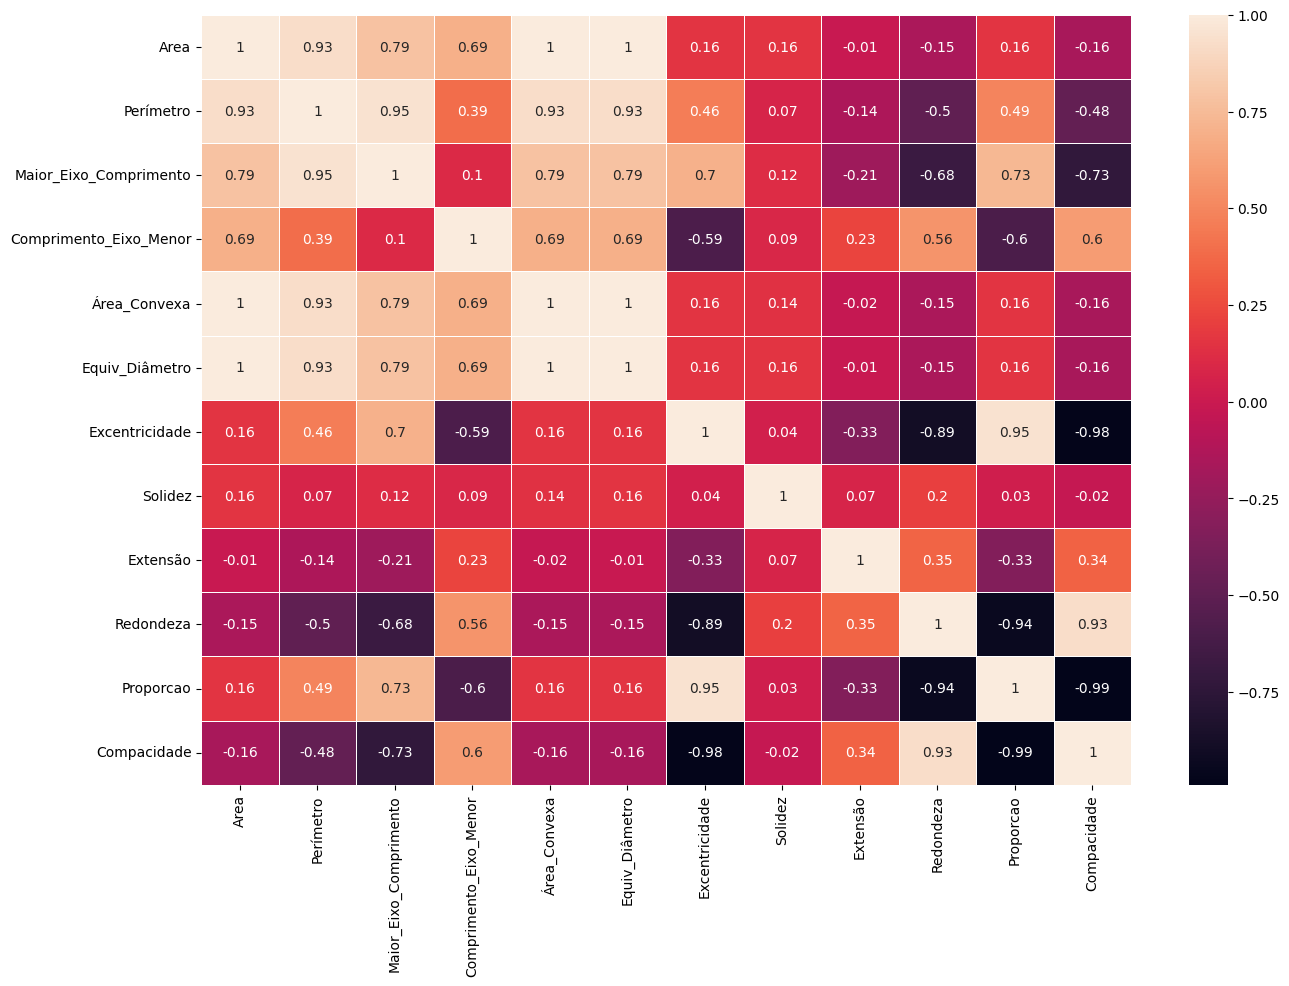

In [65]:
#Matriz de correlação
df_col = df.drop('Class', axis= 1)
correlation_matrix = df_col.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento possuem correlação maior que 0.90 quando analisadas com a variável Perímetro, isso se deve pelo motivo que todas essas variáveis são relacionadas ao tamanho das sementes. Sendo assim, não é necessário adiconar todas no modelo.

# Tratando a variável target

In [66]:
# Como temos somente 2 tipos de sementes, serão classificados em 0 e 1
le = LabelEncoder()
df.Class = le.fit_transform(df['Class'])
set(df['Class']) 

{0, 1}

# Separando os dados
Lembrando que as variáveis com altamente correlacionadas não serao incluídas no modelo (Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento), exceto 1 delas, para representar todas, neste caso será a Area_convexa.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 697 to 511
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   float64
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   float64
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 263.7 KB


In [68]:
X = df[['Área_Convexa','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']    

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Pré-processamento dos dados

Apesar de deep learning não requerer distribuições normais, é comum aplicar técnicas de pré-processamento de dados para normalizar ou padronizar as características. Isso pode ajudar a acelerar a convergência do treinamento da rede neural.

A convergência está relacionada com o erro, ou seja, o quanto a sua rede aprende a corrigir os erros durante o processamento.

In [70]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [71]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)     

In [72]:
X_train.shape

(2000, 9)

In [73]:
X_test.shape

(500, 9)

# Moldando variáveis resposta

Moldar para o formato de array -n dimensional(matriz)

O comando reshape é utilizado para reformatar a estrutura de um array multidimensional, como um tensor, que é a estrutura de dados fundamental usada em deep learning e processamento de dados em redes neurais.


In [74]:
type(y_train)

pandas.core.series.Series

In [75]:
y_train

2407    1
1754    1
2245    1
1715    1
730     0
       ..
38      0
2486    1
1400    1
950     0
2452    1
Name: Class, Length: 2000, dtype: int32

In [76]:
# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Construindo a arquitetura da rede neural multicamadas

Utilizando bibliotemas: tensorflow e keras

In [77]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(42)

# Definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 20 #lote de processamento

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
# Entrada da rede
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        12 #numero de neuronios da camada
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summmary
model.summary()
     

c:\Users\Unip\.vscode\scripts\Tech-challenge\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )

 66%|██████▌   | 66/100 [00:16<00:07,  4.83epoch/s, accuracy=0.849, loss=0.342, val_accuracy=0.888, val_loss=0.271]

In [ ]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 83.40% com 100 epochs de processamento


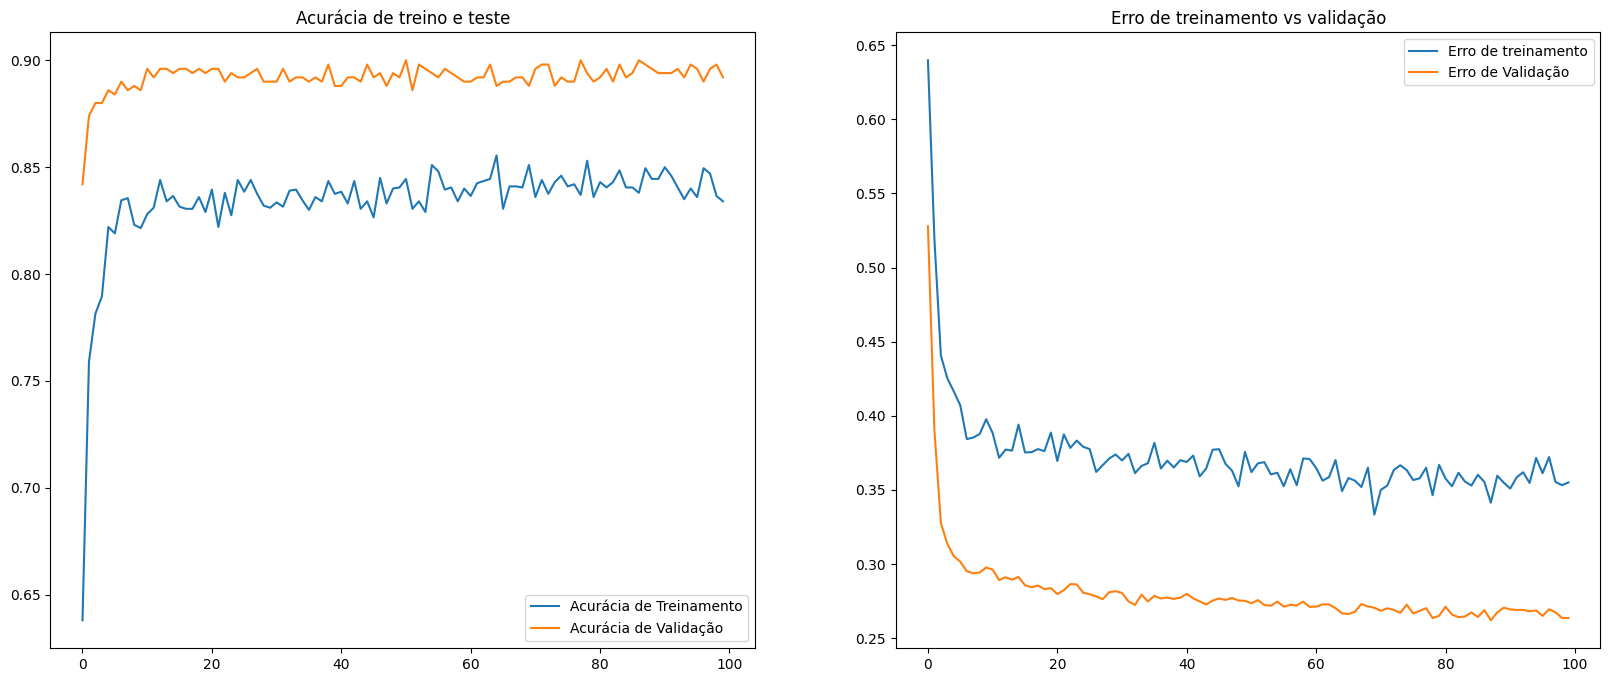

In [ ]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.89      0.91      0.90       263
  (A) Çerçevelik        0.90      0.87      0.88       237

         accuracy                           0.89       500
        macro avg       0.89      0.89      0.89       500
     weighted avg       0.89      0.89      0.89       500



a rede apresentou um bom aprendizado e conseguiu distingir as sementes através dos dados fornecidos. 